# I. $LU$ factorization of a square matrix
When we premultply $A$ by lower triangular elemetary matrices $\Lambda_j$ it is trasfrommed in an  upper triangular matrix $U$

$$  \Lambda_{n-1}  \ldots\Lambda_2  \Lambda_1 A  = U$$

$$  A  = (\Lambda_{n-1}  \ldots\Lambda_2  \Lambda_2 )^{-1} U$$

The inverse of a product of matrices is the revesre product of inverses
$$  A  = (\Lambda_1^{-1}  \Lambda_2^{-1} \ldots  \Lambda_{n-1}^{-1}) U$$

and inverse of a Lower Triangular Elemetary Matrix is minus the matrix $\Lambda_j^{-1} = - \Lambda_j$, so 

$$ A  =  (-\Lambda_1) (-\Lambda_2) \ldots   (-\Lambda_{n-1})  U$$

So the $LU$ column pivot factorization is 
$$  A  = L U$$
with
$$ U = \Lambda_{n-1}  \ldots\Lambda_2  \Lambda_1 A  $$
an upper triangular matrix
$$ L  =  \Lambda_1^{-1}  \Lambda_2^{-1} \ldots  \Lambda_{n-1}^{-1} m = (-\Lambda_1) (-\Lambda_2) \ldots   (-\Lambda_{n-1})  $$
an lower triangular matrix.

Consider a simple naive implementation of the LU decomposition. 

Note that we're using the `numpy` arrays to represent matrices [do **not** use `np.matrix`].

In [1]:
import numpy as np

def diy_lu(a):
    """Construct the LU decomposition of the input matrix.
    
    Naive LU decomposition: work column by column, accumulate elementary triangular matrices.
    No pivoting.
    """
    N = a.shape[0]
    
    u = a.copy()
    L = np.eye(N)
    for j in range(N-1):
        lam = np.eye(N)
        gamma = u[j+1:, j] / u[j, j]
        lam[j+1:, j] = -gamma
        u = lam @ u

        lam[j+1:, j] = gamma
        L = L @ lam
    return L, u

In [10]:
# Now, generate a full rank matrix and test the naive implementation

import numpy as np

N = 6
a = np.zeros((N, N), dtype=float)
for i in range(N):
    for j in range(N):
        a[i, j] = 3. / (0.6*i*j + 1)

np.linalg.matrix_rank(a)

6

In [12]:
np.round(a,3)

array([[3.   , 3.   , 3.   , 3.   , 3.   , 3.   ],
       [3.   , 1.875, 1.364, 1.071, 0.882, 0.75 ],
       [3.   , 1.364, 0.882, 0.652, 0.517, 0.429],
       [3.   , 1.071, 0.652, 0.469, 0.366, 0.3  ],
       [3.   , 0.882, 0.517, 0.366, 0.283, 0.231],
       [3.   , 0.75 , 0.429, 0.3  , 0.231, 0.188]])

In [13]:
# Tweak the printing of floating-point numbers, for clarity
np.set_printoptions(precision=3)

In [14]:
L, u = diy_lu(a)

print(L, "\n")
print(u, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print(L@u - a)

[[1.    0.    0.    0.    0.    0.   ]
 [1.    1.    0.    0.    0.    0.   ]
 [1.    1.455 1.    0.    0.    0.   ]
 [1.    1.714 1.742 1.    0.    0.   ]
 [1.    1.882 2.276 2.039 1.    0.   ]
 [1.    2.    2.671 2.944 2.354 1.   ]] 

[[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -1.125e+00 -1.636e+00 -1.929e+00 -2.118e+00 -2.250e+00]
 [ 0.000e+00  0.000e+00  2.625e-01  4.574e-01  5.975e-01  7.013e-01]
 [ 0.000e+00  2.220e-16  0.000e+00 -2.197e-02 -4.480e-02 -6.469e-02]
 [ 0.000e+00 -4.528e-16  0.000e+00  6.939e-18  8.080e-04  1.902e-03]
 [ 0.000e+00  4.123e-16  0.000e+00 -1.634e-17  0.000e+00 -1.585e-05]] 

[[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.110e-16  1.110e-16  1.110e-16 -5.551e-17]
 [ 0.000e+00  0.000e+00  3.331e-16 -2.220e-16 -5.551e-17  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 -1.110e-16 -1.665e-16  0.000e+00]
 

# II. The need for pivoting

Let's tweak the matrix a little bit, we only change a single element:

In [22]:
a1 = A.copy()
a1[1, 1] = 3

In [23]:
np.round(a1,3)

array([[3.   , 3.   , 3.   , 3.   , 3.   , 3.   ],
       [3.   , 3.   , 1.364, 1.071, 0.882, 0.75 ],
       [3.   , 1.364, 0.882, 0.652, 0.517, 0.429],
       [3.   , 1.071, 0.652, 0.469, 0.366, 0.3  ],
       [3.   , 0.882, 0.517, 0.366, 0.283, 0.231],
       [3.   , 0.75 , 0.429, 0.3  , 0.231, 0.188]])

In [24]:
np.linalg.matrix_rank(a1)

6

In [25]:
L, U= diy_lu(a1)

print(L, U)

[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]] [[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


The LU decomposition from scipy.linalg.lu already implements pivoting other sophisticated controls 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html

$$A = P L U$$

```python

 P ,  L,  U  = scipy.linalg.lu(a, permute_l=False, overwrite_a=False, check_finite=True)

# Returns
# (If permute_l == False)
# P : Permutation matrix
# L : Lower triangular or trapezoidal matrix with unit diagonal. K = min
# U : Upper triangular or trapezoidal matrix
```

In [26]:
from scipy import linalg
P ,  L,  U = linalg.lu(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",np.round(U,3), "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")


P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[1.    0.    0.    0.    0.    0.   ]
 [1.    1.    0.    0.    0.    0.   ]
 [1.    0.5   1.    0.    0.    0.   ]
 [1.    0.727 0.706 1.    0.    0.   ]
 [1.    0.857 0.41  0.835 1.    0.   ]
 [1.    0.941 0.178 0.426 0.789 1.   ]] 

U
 [[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -2.250e+00 -2.571e+00 -2.700e+00 -2.769e+00 -2.812e+00]
 [ 0.000e+00  0.000e+00 -3.510e-01 -5.790e-01 -7.330e-01 -8.440e-01]
 [ 0.000e+00  0.000e+00  0.000e+00  2.400e-02  4.900e-02  7.000e-02]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -1.000e-03 -2.000e-03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]] 

A= P@L@U
 [[3.    3.    3.    3.    3.    3.   ]
 [3.    1.875 1.364 1.071 0.882 0.75 ]
 [3.    1.364 0.882 0.652 0.517 0.429]
 [3.    1.071 0.652 0.469 0.366 0.3  ]
 [3.    0.882 0.517 0.366 0.283 0.231]
 [3

In [27]:
P ,  L,  U = linalg.lu(A1)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",np.round(U,3), "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")


P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[ 1.     0.     0.     0.     0.     0.   ]
 [ 1.     1.     0.     0.     0.     0.   ]
 [ 1.    -0.     1.     0.     0.     0.   ]
 [ 1.     0.727  0.151  1.     0.     0.   ]
 [ 1.     0.857  0.088  0.514  1.     0.   ]
 [ 1.     0.941  0.038  0.208  0.641  1.   ]] 

U
 [[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -2.250e+00 -2.571e+00 -2.700e+00 -2.769e+00 -2.812e+00]
 [ 0.000e+00  0.000e+00 -1.636e+00 -1.929e+00 -2.118e+00 -2.250e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 -9.200e-02 -1.480e-01 -1.860e-01]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  2.000e-03  4.000e-03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e+00]] 

A= P@L@U
 [[3.    3.    3.    3.    3.    3.   ]
 [3.    3.    1.364 1.071 0.882 0.75 ]
 [3.    1.364 0.882 0.652 0.517 0.429]
 [3.    1.071 0.652 0.469 0.366 0.3  ]
 [3.  

### Test II.1

For a naive LU decomposition to work, all leading minors of a matrix should be non-zero. Check if this requirement is satisfied for the two matrices `a` and `a1`.

(20% of the grade)

In [28]:
#Python3

#First we need to create a new function, this with the objective of chechkin the leading minors (and that those are $neq$ to 0).

def LM(A):
   for i in range(int(A.size**0.5)): #run all the matrix
     N = A[i,i]
     if (N == 0): #check for the zeros
       return False
       break
   return True

LM(a), LM(a1)

(True, True)

### Test II.2

Modify the `diy_lu` routine to implement column pivoting. Keep track of pivots, you can either construct a permutation matrix, or a swap array (your choice).

(40% of the grade)

Implement a function to reconstruct the original matrix from a decompositon. Test your routines on the matrices `a` and `a1`.

(40% of the grade)

In [29]:
#Python3

#Take the original function, then lets modify it, this to fulfill the actual pivoting

def diy_lu_piv(a):

    N = a.shape[0]
    #u = a.copy() no longer needed

    #L = np.eye(N) no longer needed
    L = a.copy()
    U = np.eye(N)

    # For the naive LU decomposition to work, we run column by column, accumulate elementary triangular matrices.

    for j in range(N-1):

        lam = np.eye(N)
        gamma = L[j, j + 1:] / L[j, j]
        lam[j, j + 1:] = -gamma
        L = L @ lam
        
        lam[j, j + 1:] = gamma
        U = lam @ U

    return L, U

In [30]:
L, U = diy_lu_piv(a)

In [31]:
print('Identified Lower:', L)

Identified Lower: [[ 3.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 3.000e+00 -1.125e+00  0.000e+00  2.220e-16 -4.528e-16  4.123e-16]
 [ 3.000e+00 -1.636e+00  2.625e-01  0.000e+00  0.000e+00  0.000e+00]
 [ 3.000e+00 -1.929e+00  4.574e-01 -2.197e-02  6.939e-18 -1.634e-17]
 [ 3.000e+00 -2.118e+00  5.975e-01 -4.480e-02  8.080e-04  0.000e+00]
 [ 3.000e+00 -2.250e+00  7.013e-01 -6.469e-02  1.902e-03 -1.585e-05]]


In [32]:
print('Identified Upper:', U)

Identified Upper: [[1.    1.    1.    1.    1.    1.   ]
 [0.    1.    1.455 1.714 1.882 2.   ]
 [0.    0.    1.    1.742 2.276 2.671]
 [0.    0.    0.    1.    2.039 2.944]
 [0.    0.    0.    0.    1.    2.354]
 [0.    0.    0.    0.    0.    1.   ]]


In [33]:
print(L @ U - a)

[[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.110e-16  3.331e-16  0.000e+00 -1.110e-16]
 [ 0.000e+00  0.000e+00  1.110e-16 -2.220e-16 -1.110e-16 -2.776e-16]
 [ 0.000e+00  0.000e+00  1.110e-16 -5.551e-17 -1.665e-16  1.110e-16]
 [ 0.000e+00  0.000e+00 -5.551e-17  0.000e+00  0.000e+00  1.110e-16]]


# 2. $LU$ factorization column pivoting and reconstruction
When we premultply $A$ by elementary permutation matricex$P_j$( to find a good pivot) and then premultply by lower triangular elemetary matrices $\Lambda_j$, $A$  it is transformed in an  upper triangular matrix $U$

$$  
(\Lambda_{n-1} P_{n-1} \ldots \Lambda_2 P_2 \Lambda_1 P_1)A  = U
$$
and 
$$  
A  = (\Lambda_{n-1} P_{n-1} \ldots \Lambda_2 P_2 \Lambda_1 P_1)^{-1} U
$$


So the $LU$ column pivot factorization of $A$ is 
$$
A = LU
$$
ith
$$  
U = (\Lambda_{n-1} P_{n-1} \ldots \Lambda_2 P_2 \Lambda_1 P_1) A
$$
$$
\begin{array}{ll}L  &=  (\Lambda_{n-1} P_{n-1} \ldots \Lambda_2 P_2 \Lambda_1 P_1)^{-1}\\
&= P_1^{-1} \Lambda_1^{-1} P_2^{-1} \Lambda_2^{-1} \ldots  P_{n-1}^{-1}\\
 &= P_1^{t} (-\Lambda_1) P_2^{t} (-\Lambda_2) \ldots  P_{n-1}^{t} (-\Lambda_{n-1})
\end{array}
$$
because the inverse a of a Lower Triangular Elemetary Matrix is minus the matrix $\Lambda_i^{-1} = - \Lambda_i$ and the inverse of a Permutation Matrix (in particular an elementary permutation matrix)  is its transpose [math.stackexchange](
        https://math.stackexchange.com/questions/98549/the-transpose-of-a-permutation-matrix-is-its-inverse#:~:text=Taking%20the%20transpose%20of%20P,Pt%3DP%E2%88%921.)  $P_i^{-1}=P_i^{t}$.

Note that 
$$
L= P_1^{t} (-\Lambda_1) P_2^{t} (-\Lambda_2) \ldots  P_{n-1}^{t} (-\Lambda_{n-1})
$$
is not exactly a lower tiangular matrix but a row permutated lower tiangular matrix.





$$PA = LU$$

In [34]:
def diy_lu_column_pivot_reconstruct(A):
    """Construct the LU decomposition of the input matrix.
    
    LU decomposition with pivot: work column by column, accumulate elementary triangular matrices L @ np.transpose(Pj) .
    """
   # ... ENTER YOUR CODE HERE ...

    return  P, L , U

In [36]:
A = np.array([[4,3,1], [5,7,0], [9,9,3]])

P, L, U, = diy_lu_column_pivot_reconstruct(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")


P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[ 3.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 3.000e+00 -1.125e+00  0.000e+00  2.220e-16 -4.528e-16  4.123e-16]
 [ 3.000e+00 -1.636e+00  2.625e-01  0.000e+00  0.000e+00  0.000e+00]
 [ 3.000e+00 -1.929e+00  4.574e-01 -2.197e-02  6.939e-18 -1.634e-17]
 [ 3.000e+00 -2.118e+00  5.975e-01 -4.480e-02  8.080e-04  0.000e+00]
 [ 3.000e+00 -2.250e+00  7.013e-01 -6.469e-02  1.902e-03 -1.585e-05]] 

U
 [[1.    1.    1.    1.    1.    1.   ]
 [0.    1.    1.455 1.714 1.882 2.   ]
 [0.    0.    1.    1.742 2.276 2.671]
 [0.    0.    0.    1.    2.039 2.944]
 [0.    0.    0.    0.    1.    2.354]
 [0.    0.    0.    0.    0.    1.   ]] 

A= P@L@U
 [[3.    3.    3.    3.    3.    3.   ]
 [3.    1.364 0.882 0.652 0.517 0.429]
 [3.    1.071 0.652 0.469 0.366 0.3  ]
 [3.    0.882 0.517 0.366 0.283 0.231]
 [3.    0.75  0.429 0.3   0.231 0.188]
 [3

In [37]:
from scipy import linalg

A = np.array([[4,3,1], [5,7,0], [9,9,3]])

P,L,U = linalg.lu(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] 

L
 [[ 1.     0.     0.   ]
 [ 0.556  1.     0.   ]
 [ 0.444 -0.5    1.   ]] 

U
 [[ 9.     9.     3.   ]
 [ 0.     2.    -1.667]
 [ 0.     0.    -1.167]] 

A= P@L@U
 [[4. 3. 1.]
 [5. 7. 0.]
 [9. 9. 3.]] 

A
 [[4 3 1]
 [5 7 0]
 [9 9 3]] 

L@u - A
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 



In [39]:
N = 6
A = np.zeros((N, N), dtype=float)
for i in range(N):
    for j in range(N):
        A[i, j] = 3. / (0.6*i*j + 1)

P, L, U, = diy_lu_column_pivot_reconstruct(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")


P
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] 

L
 [[ 1.     0.     0.   ]
 [ 0.556  1.     0.   ]
 [ 0.444 -0.5    1.   ]] 

U
 [[ 9.     9.     3.   ]
 [ 0.     2.    -1.667]
 [ 0.     0.    -1.167]] 

A= P@L@U
 [[4. 3. 1.]
 [5. 7. 0.]
 [9. 9. 3.]] 

A
 [[3.    3.    3.    3.    3.    3.   ]
 [3.    1.875 1.364 1.071 0.882 0.75 ]
 [3.    1.364 0.882 0.652 0.517 0.429]
 [3.    1.071 0.652 0.469 0.366 0.3  ]
 [3.    0.882 0.517 0.366 0.283 0.231]
 [3.    0.75  0.429 0.3   0.231 0.188]] 



In [40]:
from scipy import linalg

P,L,U = linalg.lu(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[1.    0.    0.    0.    0.    0.   ]
 [1.    1.    0.    0.    0.    0.   ]
 [1.    0.5   1.    0.    0.    0.   ]
 [1.    0.727 0.706 1.    0.    0.   ]
 [1.    0.857 0.41  0.835 1.    0.   ]
 [1.    0.941 0.178 0.426 0.789 1.   ]] 

U
 [[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -2.250e+00 -2.571e+00 -2.700e+00 -2.769e+00 -2.812e+00]
 [ 0.000e+00  0.000e+00 -3.506e-01 -5.786e-01 -7.330e-01 -8.438e-01]
 [ 0.000e+00  0.000e+00  0.000e+00  2.421e-02  4.866e-02  6.961e-02]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -6.462e-04 -1.516e-03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  6.730e-06]] 

A= P@L@U
 [[3.    3.    3.    3.    3.    3.   ]
 [3.    1.875 1.364 1.071 0.882 0.75 ]
 [3.    1.364 0.882 0.652 0.517 0.429]
 [3.    1.071 0.652 0.469 0.366 0.3  ]
 [3.    0.882 0.517 0.366 0.283 0.231]
 [3

In [41]:
A[1, 1] = 3

P, L, U, = diy_lu_column_pivot_reconstruct(A1)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[1.    0.    0.    0.    0.    0.   ]
 [1.    1.    0.    0.    0.    0.   ]
 [1.    0.5   1.    0.    0.    0.   ]
 [1.    0.727 0.706 1.    0.    0.   ]
 [1.    0.857 0.41  0.835 1.    0.   ]
 [1.    0.941 0.178 0.426 0.789 1.   ]] 

U
 [[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -2.250e+00 -2.571e+00 -2.700e+00 -2.769e+00 -2.812e+00]
 [ 0.000e+00  0.000e+00 -3.506e-01 -5.786e-01 -7.330e-01 -8.438e-01]
 [ 0.000e+00  0.000e+00  0.000e+00  2.421e-02  4.866e-02  6.961e-02]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -6.462e-04 -1.516e-03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  6.730e-06]] 

A= P@L@U
 [[3.    3.    3.    3.    3.    3.   ]
 [3.    1.875 1.364 1.071 0.882 0.75 ]
 [3.    1.364 0.882 0.652 0.517 0.429]
 [3.    1.071 0.652 0.469 0.366 0.3  ]
 [3.    0.882 0.517 0.366 0.283 0.231]
 [3

In [42]:
from scipy import linalg

P,L,U = linalg.lu(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[ 1.     0.     0.     0.     0.     0.   ]
 [ 1.     1.     0.     0.     0.     0.   ]
 [ 1.    -0.     1.     0.     0.     0.   ]
 [ 1.     0.727  0.151  1.     0.     0.   ]
 [ 1.     0.857  0.088  0.514  1.     0.   ]
 [ 1.     0.941  0.038  0.208  0.641  1.   ]] 

U
 [[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -2.250e+00 -2.571e+00 -2.700e+00 -2.769e+00 -2.812e+00]
 [ 0.000e+00  0.000e+00 -1.636e+00 -1.929e+00 -2.118e+00 -2.250e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 -9.247e-02 -1.485e-01 -1.856e-01]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.841e-03  3.821e-03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -1.233e-05]] 

A= P@L@U
 [[3.    3.    3.    3.    3.    3.   ]
 [3.    3.    1.364 1.071 0.882 0.75 ]
 [3.    1.364 0.882 0.652 0.517 0.429]
 [3.    1.071 0.652 0.469 0.366 0.3  ]
 [3.  

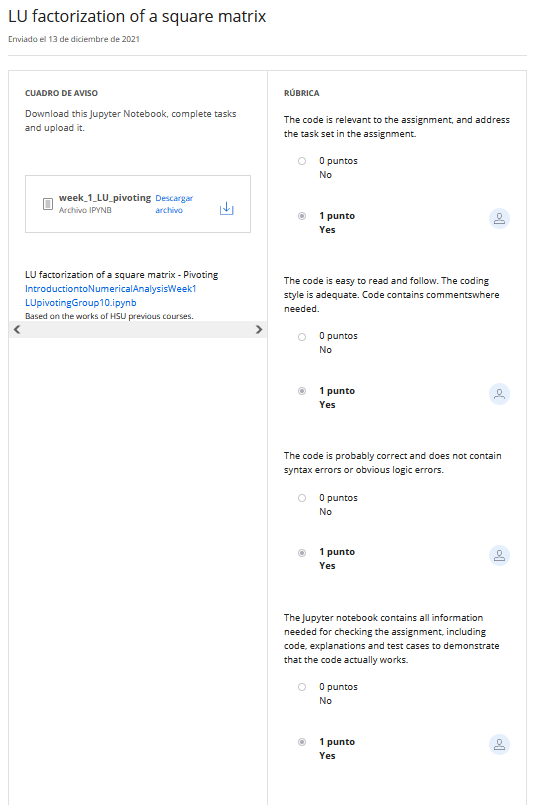